In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy as np
import tensorflow as tf

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap='Greys', interpolation='nearest')

In [26]:
training_digits, training_labels = mnist.train.next_batch(10000)
test_digits, test_labels = mnist.test.next_batch(200)

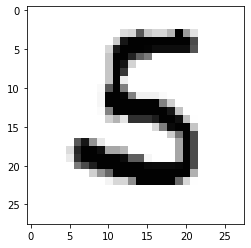

In [27]:
display_digit(training_digits[1])

In [28]:
training_labels[:5]

array([4, 5, 2, 7, 5], dtype=uint8)

In [29]:
tf.reset_default_graph()

In [30]:
training_digits_pl = tf.placeholder('float', [None, 784])

In [31]:
test_digit_pl = tf.placeholder('float', [784])

In [32]:
def get_majority_predicted_label(labels, indices):
    
    predicted_labels = []
    for i in indices:
        predicted_labels.append(labels[i])
        
    predicted_labels = np.array(predicted_labels)
    
    print(predicted_labels)
    
    counts = np.bincount(predicted_labels)
    
    return np.argmax(counts)

In [33]:
l1_dist = tf.abs(tf.subtract(training_digits_pl, test_digit_pl))

distance_l1 = tf.reduce_sum(l1_dist, axis=1)

pred_knn_l1 = tf.nn.top_k(tf.negative(distance_l1), k=1)

In [34]:
accuracy = 0

In [35]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(test_digits)):
        
        _, indices = sess.run(pred_knn_l1, feed_dict = {training_digits_pl: training_digits,
                                                        test_digit_pl: test_digits[i, :]})
        
        predicted_label = get_majority_predicted_label(training_labels, indices)
        
        print('Test', i, 'Prediction:', predicted_label,
             'True Label: ', test_labels[i])
        
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)
            
    print('Done!')
    print('Accuracy: ',accuracy)

[1]
Test 0 Prediction: 1 True Label:  1
[8]
Test 1 Prediction: 8 True Label:  8
[2]
Test 2 Prediction: 2 True Label:  2
[5]
Test 3 Prediction: 5 True Label:  5
[2]
Test 4 Prediction: 2 True Label:  2
[2]
Test 5 Prediction: 2 True Label:  2
[9]
Test 6 Prediction: 9 True Label:  9
[1]
Test 7 Prediction: 1 True Label:  1
[6]
Test 8 Prediction: 6 True Label:  6
[6]
Test 9 Prediction: 6 True Label:  6
[4]
Test 10 Prediction: 4 True Label:  4
[6]
Test 11 Prediction: 6 True Label:  6
[9]
Test 12 Prediction: 9 True Label:  9
[7]
Test 13 Prediction: 7 True Label:  8
[1]
Test 14 Prediction: 1 True Label:  1
[4]
Test 15 Prediction: 4 True Label:  4
[9]
Test 16 Prediction: 9 True Label:  9
[7]
Test 17 Prediction: 7 True Label:  7
[5]
Test 18 Prediction: 5 True Label:  5
[2]
Test 19 Prediction: 2 True Label:  2
[7]
Test 20 Prediction: 7 True Label:  7
[5]
Test 21 Prediction: 5 True Label:  5
[2]
Test 22 Prediction: 2 True Label:  2
[0]
Test 23 Prediction: 0 True Label:  0
[6]
Test 24 Prediction: 6 